In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install scikit-learn --quiet

In [3]:
!pip install bioinfokit --quiet

### Import Package & Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("mcdonalds.csv")

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.shape

(1453, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [11]:
df1 = df.iloc[:, :11].apply(lambda x : np.where(x == 'Yes', 1, 0))

In [12]:
df1.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


In [13]:
df1.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

### Explore Data

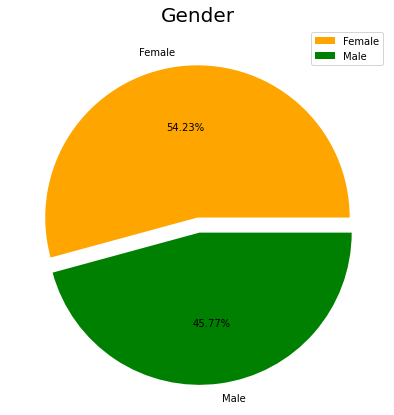

In [66]:
#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['orange', 'green']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

we infer that there are more female customers than male.

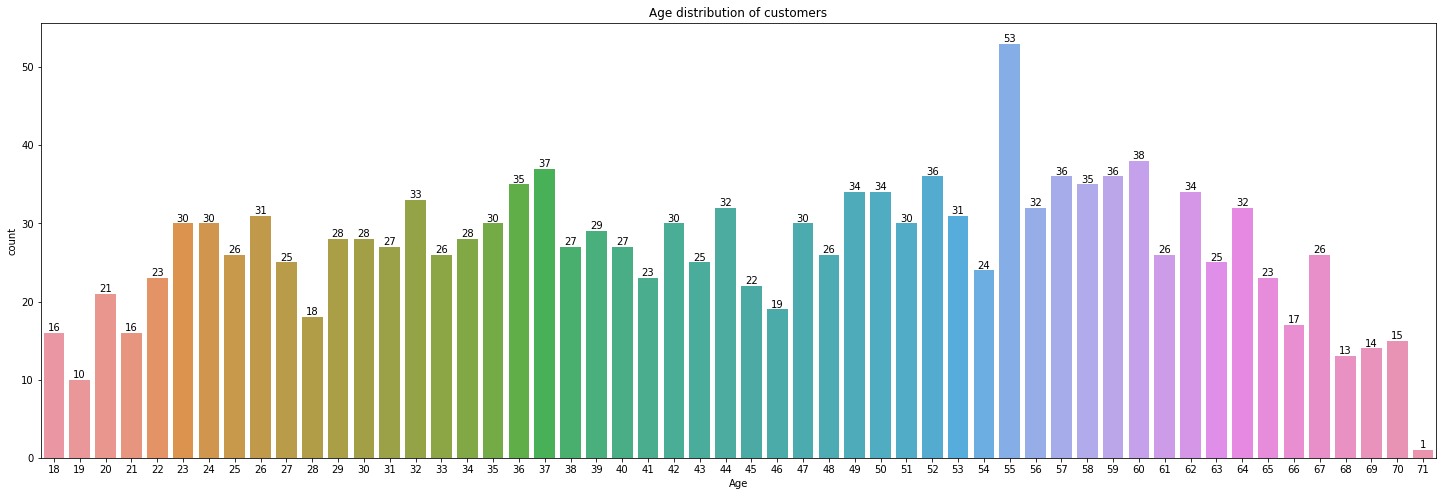

In [64]:
#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'])
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()


Mcdonalds recieve more customers of age between 50-60 and 35-40.

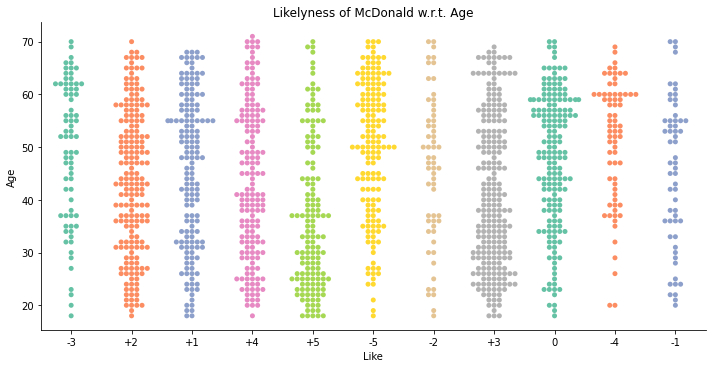

In [68]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t. Age')
plt.show()

### PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca_df = PCA(n_components=11)

In [16]:
pca_features = pca_df.fit_transform(df1)

In [17]:
pca_features

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [18]:
pca_df.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

The amount of variance explained by each of the selected components. Equal to n_components largest eigenvalues of the covariance matrix of X.

In [19]:
pca_df.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

Percentage of variance explained by each of the selected components.
If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [20]:
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca_df.explained_variance_),
    'Proportion of Variance': pca_df.explained_variance_ratio_,
    'Cumulative Proportion': pca_df.explained_variance_ratio_.cumsum()
}).T

for i in summary_df.columns:
    summary_df.rename(columns ={i:f"PC{i+1}"}, inplace=True)

In [21]:
summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.7570,0.6075,0.5046,0.3988,0.3374,0.3103,0.2897,0.2751,0.2653,0.2488,0.2369
Proportion of Variance,0.2994,0.1928,0.1330,0.0831,0.0595,0.0503,0.0438,0.0395,0.0368,0.0324,0.0293
Cumulative Proportion,0.2994,0.4922,0.6253,0.7084,0.7679,0.8182,0.8620,0.9016,0.9383,0.9707,1.0000


In [22]:
#pca_df.components_

The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.

In [23]:
pca_matrix = pd.DataFrame(pca_df.components_, columns = df1.columns).T
for i in pca_matrix.columns:
    pca_matrix.rename(columns ={i:f"PC{i+1}"}, inplace=True)

In [24]:
pca_matrix=pca_matrix*-1

In [25]:
pca_matrix.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


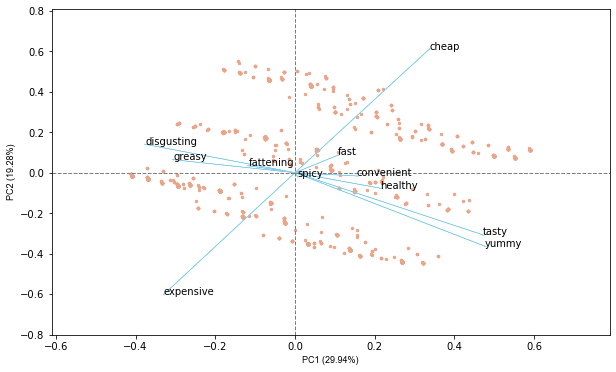

In [57]:
from bioinfokit.visuz import cluster

ax = cluster.biplot(cscore=pca_features, loadings=-1*pca_df.components_, labels=df.columns.values, 
               var1=round(pca_df.explained_variance_ratio_[0]*100,2), var2=round(pca_df.explained_variance_ratio_[1]*100,2),
                    show=True,dim=(10,6))

### KMeans Clustering

In [48]:
from sklearn.cluster import KMeans

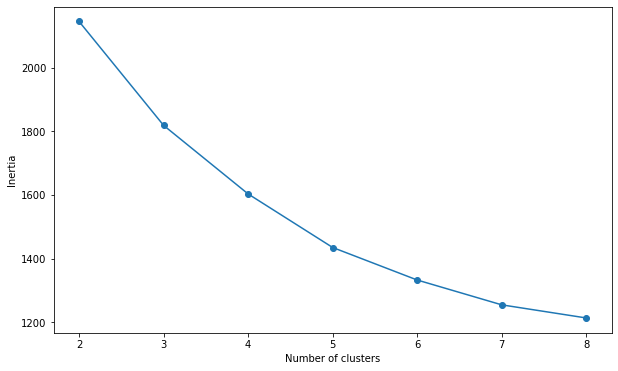

In [51]:
k_range = range(2, 9)
inertia = []

# Specify the value for n_init
n_init_value = 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 42, n_init=n_init_value)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))    
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This plot shows the inertia values for different numbers of segments (clusters), helping to determine the optimal number of segments based on the "elbow" method. If you've stored the results from multiple runs of K-means clustering, you can plot them similarly to evaluate different parameter settings or preprocessing choices.

### Extracting Segments

In [32]:
k_best = 4  # Assuming we choose the best number of segments based on the plot
kmeans_best = KMeans(n_clusters= k_best, random_state= 42, n_init= n_init_value)
kmeans_best.fit_predict(df1)

array([3, 2, 2, ..., 2, 0, 1])

In [35]:
df['cluster'] = kmeans_best.labels_

In [37]:
#To see each cluster size
from collections import Counter
Counter(kmeans_best.labels_)

Counter({3: 304, 2: 323, 0: 580, 1: 246})

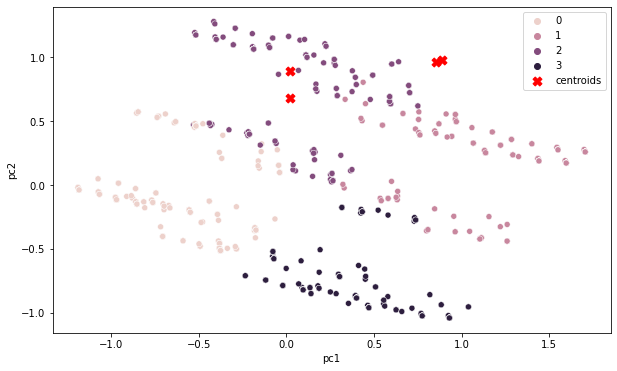

In [54]:
#Visualizing clusters
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pca_features, columns = names)

plt.figure(figsize=(10,6))
sns.scatterplot(data= pf, x="pc1", y="pc2", hue=kmeans_best.labels_)
plt.scatter(kmeans_best.cluster_centers_[:,0], kmeans_best.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

plt.legend()
plt.show()

### Describe Segments

In [69]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster'],df['Like'])

#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster,,,,,,,,,,,
0,4,4,2,6,13,43,65,90,143,111,99
1,89,28,30,19,13,39,14,6,8,0,0
2,5,3,7,6,7,36,42,60,66,47,44
3,54,36,34,28,25,51,31,31,12,2,0


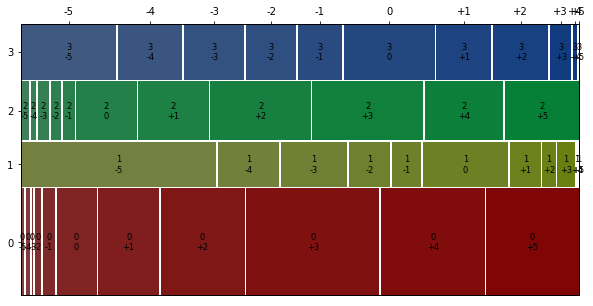

In [89]:
# Mosaic Plot
plt.rcParams['figure.figsize'] = (10,5)
mosaic(crosstab.stack(), horizontal=False)
plt.show()

In [73]:
# Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster'], df['Gender'])
crosstab_gender

Gender,Female,Male
cluster,,
0,349,231
1,106,140
2,154,169
3,179,125


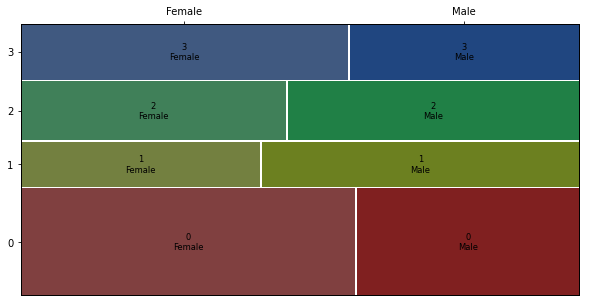

In [90]:
plt.rcParams['figure.figsize'] = (10,5)
mosaic(crosstab_gender.stack(), horizontal=False)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Age'>

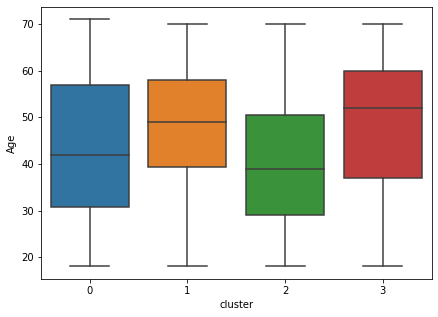

In [75]:
# Box plot for age

sns.boxplot(x="cluster", y="Age", data= df)

### Selecting target segment

In [77]:
from sklearn.preprocessing import LabelEncoder

In [79]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster,VisitFrequency
0,0,2.584483
1,1,2.654472
2,2,2.547988
3,3,2.822368


In [81]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster,Like
0,0,2.962069
1,1,7.422764
2,2,3.275542
3,3,6.171053


In [82]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster,Gender
0,0,0.398276
1,1,0.569106
2,2,0.523220
3,3,0.411184


In [85]:
segment = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
segment

,cluster,Gender,Like,VisitFrequency
0,0,0.398276,2.962069,2.584483
1,1,0.569106,7.422764,2.654472
2,2,0.523220,3.275542,2.547988
3,3,0.411184,6.171053,2.822368


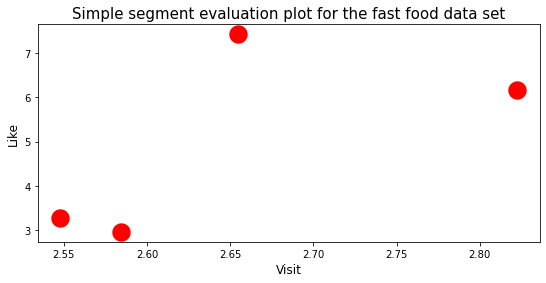

In [87]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like", data= segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()